#**Global_Electric_vehical_2024**


[Dataset link](https://www.kaggle.com/datasets/muhammadehsan000/global-electric-vehicle-sales-data-2010-2024/data)
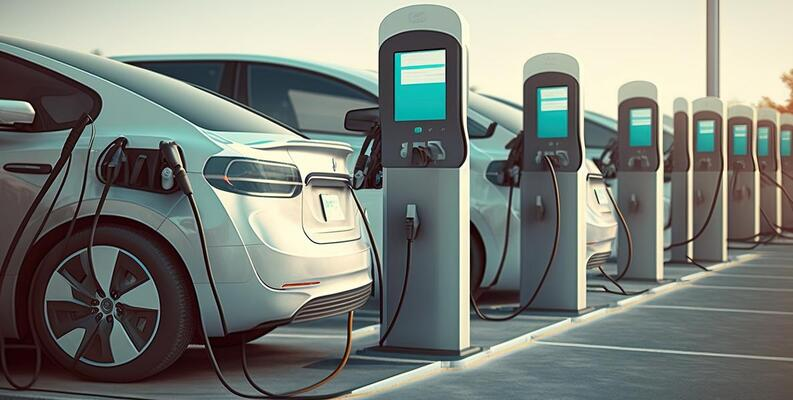

In [1]:
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio



In [8]:
# data loading
df = pd.read_csv('/content/Global_Electrical_Vehical_Dataset_2024.csv')
df.head()

region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical  EV stock share  Cars         EV  2011   percent   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value  
0    0.00039  
1    0.00650  
2   49.00000  
3   49.00000  
4  220.00000

In [4]:
# Data Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [6]:
# value_counts
for col in df.columns:
  print(f'{col}: {df[col].unique()}')

region: ['Australia' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Canada' 'Chile'
 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'EU27' 'Europe' 'Finland' 'France' 'Germany' 'Greece'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Ireland' 'Israel' 'Italy'
 'Japan' 'Korea' 'Latvia' 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands'
 'New Zealand' 'Norway' 'Poland' 'Portugal' 'Rest of the world' 'Romania'
 'Seychelles' 'Slovakia' 'Slovenia' 'South Africa' 'Spain' 'Sweden'
 'Switzerland' 'Thailand' 'Turkiye' 'United Arab Emirates'
 'United Kingdom' 'USA' 'World']
category: ['Historical' 'Projection-STEPS' 'Projection-APS']
parameter: ['EV stock share' 'EV sales share' 'EV sales' 'EV stock'
 'EV charging points' 'Electricity demand' 'Oil displacement Mbd'
 'Oil displacement, million lge']
mode: ['Cars' 'EV' 'Buses' 'Vans' 'Trucks']
powertrain: ['EV' 'BEV' 'PHEV' 'Publicly available fast' 'Publicly available slow'
 'FCEV']
year: [2011 2012 2013 2014 2015 2016 

In [7]:
df.isnull().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [12]:
# numerical statistics
df.describe()

year         value
count  12654.000000  1.265400e+04
mean    2019.822112  4.273742e+05
std        5.476494  6.860498e+06
min     2010.000000  1.200000e-06
25%     2016.000000  2.000000e+00
50%     2020.000000  1.300000e+02
75%     2022.000000  5.500000e+03
max     2035.000000  4.400000e+08

In [13]:
num_col = df.select_dtypes(include=np.number).columns
num_col

Index(['year', 'value'], dtype='object')

#**EDA**

In [15]:
# variables
df.columns


Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

#**Feature Engineering**

In [16]:
df.head()

region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical  EV stock share  Cars         EV  2011   percent   
1  Australia  Historical  EV sales share  Cars         EV  2011   percent   
2  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value  
0    0.00039  
1    0.00650  
2   49.00000  
3   49.00000  
4  220.00000

In [18]:
# convert into dummies with 0,1
df = pd.get_dummies(df, drop_first=True)
df.head()

year      value  region_Austria  region_Belgium  region_Brazil  \
0  2011    0.00039           False           False          False   
1  2011    0.00650           False           False          False   
2  2011   49.00000           False           False          False   
3  2011   49.00000           False           False          False   
4  2012  220.00000           False           False          False   

   region_Bulgaria  region_Canada  region_Chile  region_China  \
0            False          False         False         False   
1            False          False         False         False   
2            False          False         False         False   
3            False          False         False         False   
4            False          False         False         False   

   region_Colombia  ...  powertrain_EV  powertrain_FCEV  powertrain_PHEV  \
0            False  ...           True            False            False   
1            False  ...           True            False            False   
2            False  ...          False            False            False   
3            False  ...          False            False            False   
4            False  ...          False            False            False   

   powertrain_Publicly available fast  powertrain_Publicly available slow  \
0                               False                               False   
1                               False                               False   
2                               False                               False   
3                               False                               False   
4                               False                               False   

   unit_Milion barrels per day  unit_Oil displacement, million lge  \
0                        False                               False   
1                        False                               False   
2                        False                               False   
3                        False                               False   
4                        False                               False   

   unit_Vehicles  unit_charging points  unit_percent  
0          False                 False          True  
1          False                 False          True  
2           True                 False         False  
3           True                 False         False  
4           True                 False         False  

[5 rows x 78 columns]

In [19]:
# convert true - false into 0/1 ---> label Encoding
from sklearn.preprocessing import LabelEncoder
df.replace({True:1,False:0},inplace=True)
df.head()

year      value  region_Austria  region_Belgium  region_Brazil  \
0  2011    0.00039               0               0              0   
1  2011    0.00650               0               0              0   
2  2011   49.00000               0               0              0   
3  2011   49.00000               0               0              0   
4  2012  220.00000               0               0              0   

   region_Bulgaria  region_Canada  region_Chile  region_China  \
0                0              0             0             0   
1                0              0             0             0   
2                0              0             0             0   
3                0              0             0             0   
4                0              0             0             0   

   region_Colombia  ...  powertrain_EV  powertrain_FCEV  powertrain_PHEV  \
0                0  ...              1                0                0   
1                0  ...              1                0                0   
2                0  ...              0                0                0   
3                0  ...              0                0                0   
4                0  ...              0                0                0   

   powertrain_Publicly available fast  powertrain_Publicly available slow  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   unit_Milion barrels per day  unit_Oil displacement, million lge  \
0                            0                                   0   
1                            0                                   0   
2                            0                                   0   
3                            0                                   0   
4                            0                                   0   

   unit_Vehicles  unit_charging points  unit_percent  
0              0                     0             1  
1              0                     0             1  
2              1                     0             0  
3              1                     0             0  
4              1                     0             0  

[5 rows x 78 columns]

In [24]:
# load data
df.to_csv('Global_Electrical_Vehical_Dataset_2024.csv',index=False)
df = pd.read_csv('Global_Electrical_Vehical_Dataset_2024.csv')
df.head()



year      value  region_Austria  region_Belgium  region_Brazil  \
0  2011    0.00039               0               0              0   
1  2011    0.00650               0               0              0   
2  2011   49.00000               0               0              0   
3  2011   49.00000               0               0              0   
4  2012  220.00000               0               0              0   

   region_Bulgaria  region_Canada  region_Chile  region_China  \
0                0              0             0             0   
1                0              0             0             0   
2                0              0             0             0   
3                0              0             0             0   
4                0              0             0             0   

   region_Colombia  ...  powertrain_EV  powertrain_FCEV  powertrain_PHEV  \
0                0  ...              1                0                0   
1                0  ...              1                0                0   
2                0  ...              0                0                0   
3                0  ...              0                0                0   
4                0  ...              0                0                0   

   powertrain_Publicly available fast  powertrain_Publicly available slow  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   unit_Milion barrels per day  unit_Oil displacement, million lge  \
0                            0                                   0   
1                            0                                   0   
2                            0                                   0   
3                            0                                   0   
4                            0                                   0   

   unit_Vehicles  unit_charging points  unit_percent  
0              0                     0             1  
1              0                     0             1  
2              1                     0             0  
3              1                     0             0  
4              1                     0             0  

[5 rows x 78 columns]

In [27]:
print(df.columns)

Index(['year', 'value', 'region_Austria', 'region_Belgium', 'region_Brazil',
       'region_Bulgaria', 'region_Canada', 'region_Chile', 'region_China',
       'region_Colombia', 'region_Costa Rica', 'region_Croatia',
       'region_Cyprus', 'region_Czech Republic', 'region_Denmark',
       'region_EU27', 'region_Estonia', 'region_Europe', 'region_Finland',
       'region_France', 'region_Germany', 'region_Greece', 'region_Hungary',
       'region_Iceland', 'region_India', 'region_Indonesia', 'region_Ireland',
       'region_Israel', 'region_Italy', 'region_Japan', 'region_Korea',
       'region_Latvia', 'region_Lithuania', 'region_Luxembourg',
       'region_Mexico', 'region_Netherlands', 'region_New Zealand',
       'region_Norway', 'region_Poland', 'region_Portugal',
       'region_Rest of the world', 'region_Romania', 'region_Seychelles',
       'region_Slovakia', 'region_Slovenia', 'region_South Africa',
       'region_Spain', 'region_Sweden', 'region_Switzerland',
       'region_T

In [35]:
# split the data
from sklearn.model_selection import train_test_split
X = df.drop('powertrain_Publicly available slow',axis=1)
y = df['powertrain_Publicly available slow']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape
y_train.shape,y_test.shape



((10123,), (2531,))

In [36]:
# Make a classification model using logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.9628605294350059
[[2437    0]
 [  94    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2437
           1       0.00      0.00      0.00        94

    accuracy                           0.96      2531
   macro avg       0.48      0.50      0.49      2531
weighted avg       0.93      0.96      0.94      2531



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

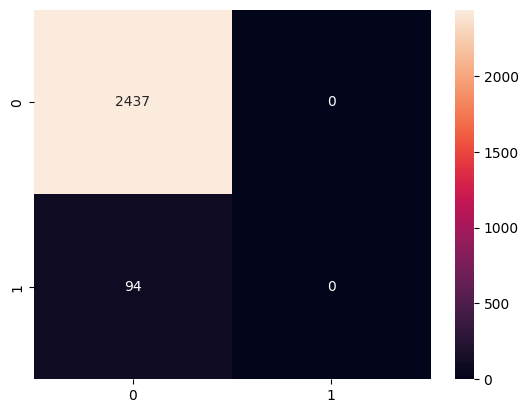

In [39]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True, fmt='d')

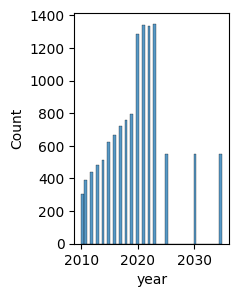

In [ ]:
# outlier detection
num_col = df.select_dtypes(include=np.number).columns
for col in num_col:
  plt.figure(figsize=(2,3))
  sns.histplot(df[col])
  plt.show()

In [2]:
# corelation
num_col = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(3,3))
sns.heatmap(df[num_col].corr(),annot=True)

NameError: name 'df' is not defined

<Axes: >

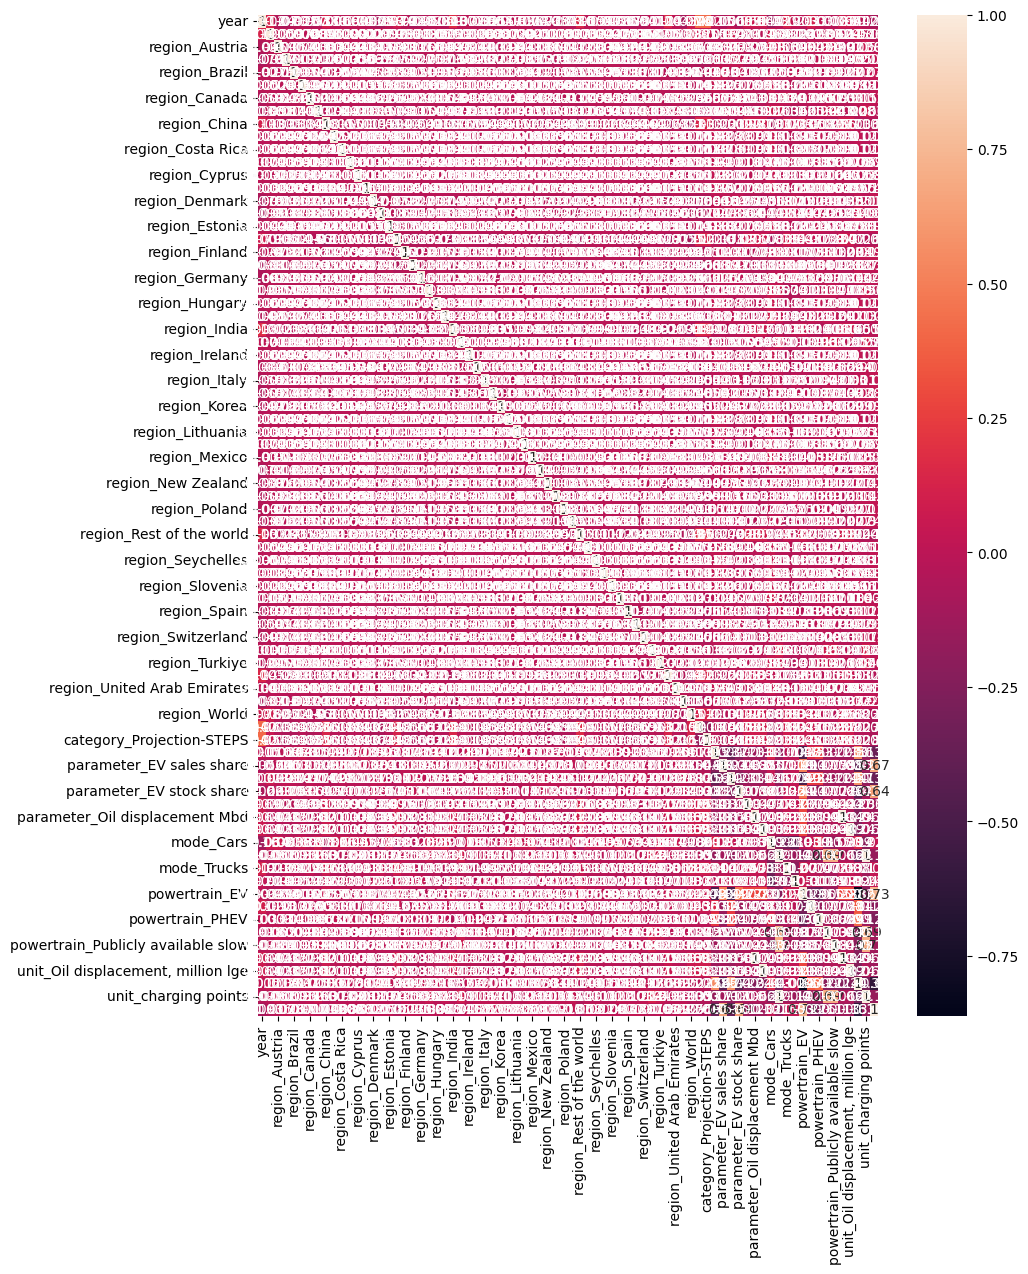

In [6]:
# Import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/Global_Electrical_Vehical_Dataset_2024.csv')

# corelation
num_col = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10,13))
sns.heatmap(df[num_col].corr(),annot=True)

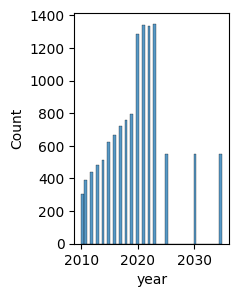

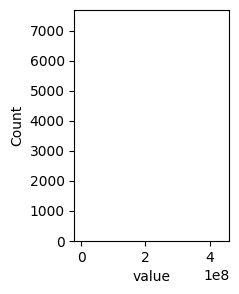

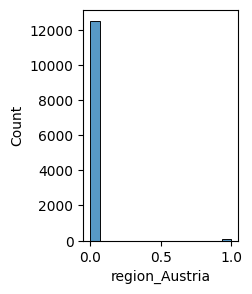

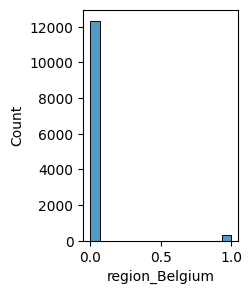

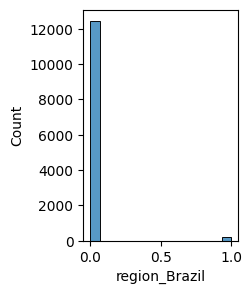

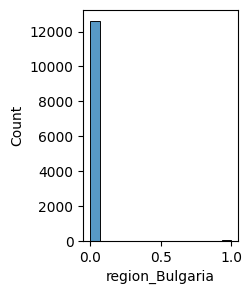

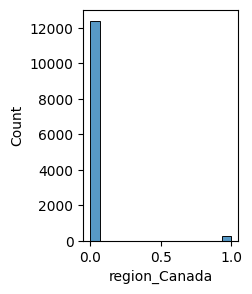

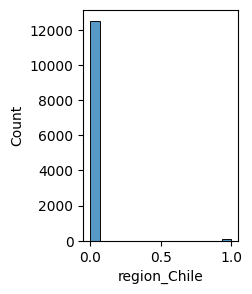

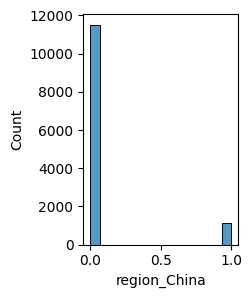

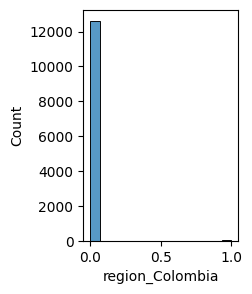

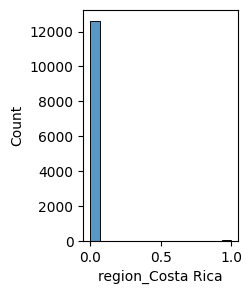

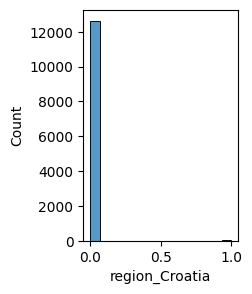

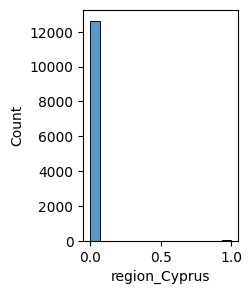

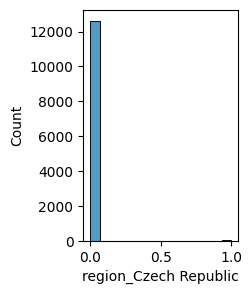

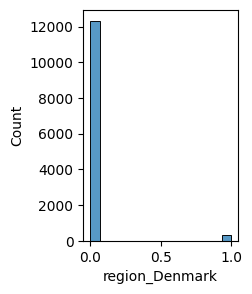

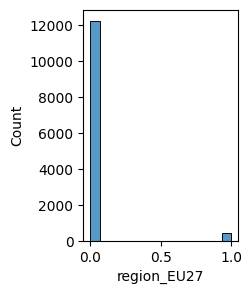

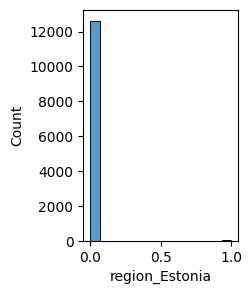

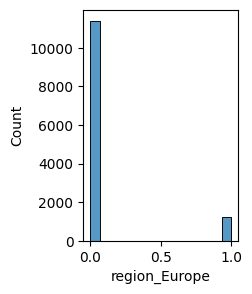

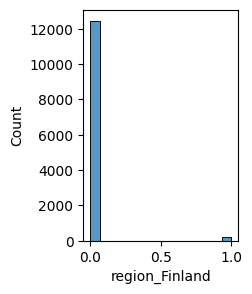

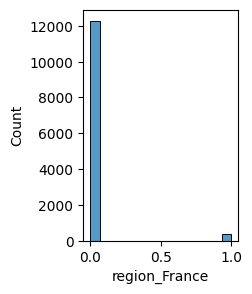

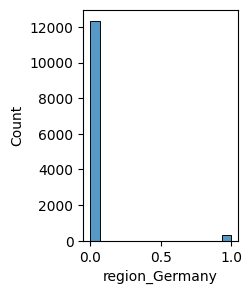

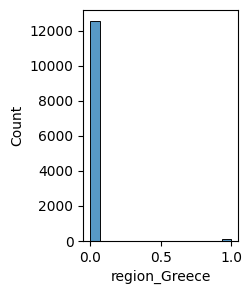

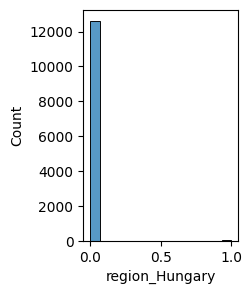

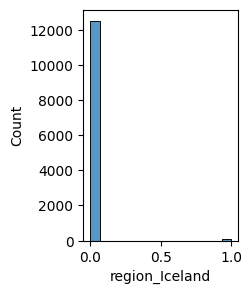

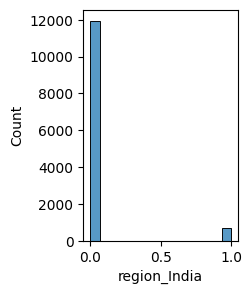

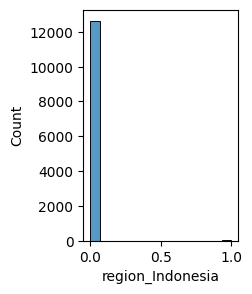

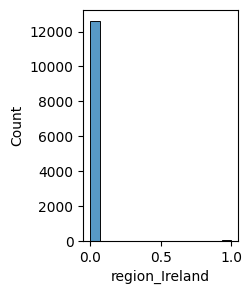

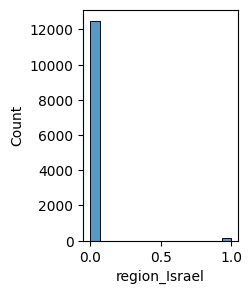

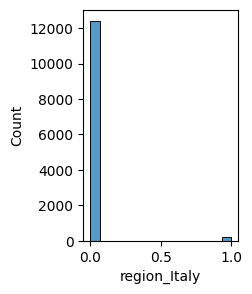

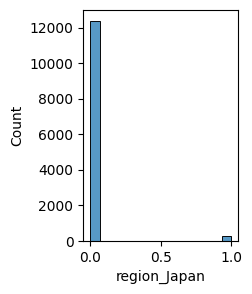

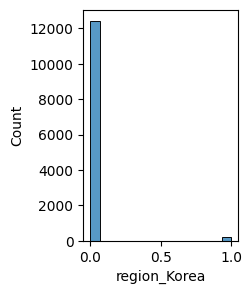

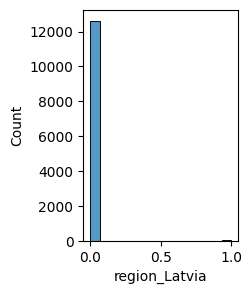

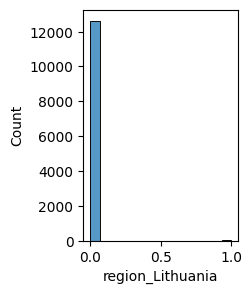

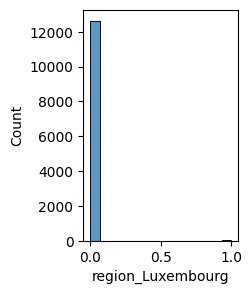

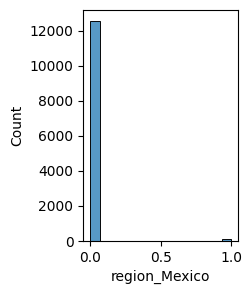

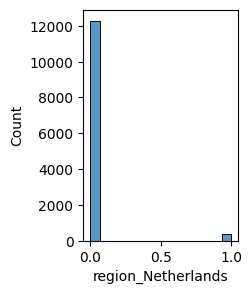

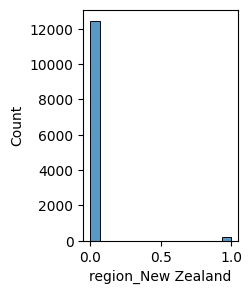

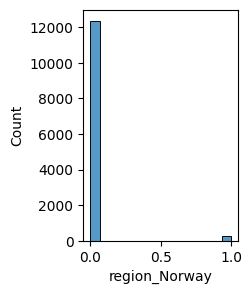

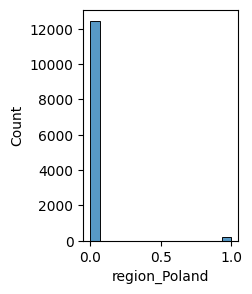

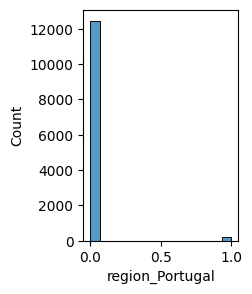

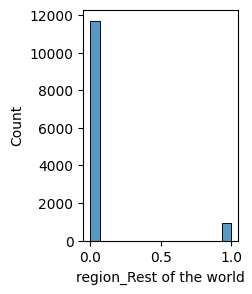

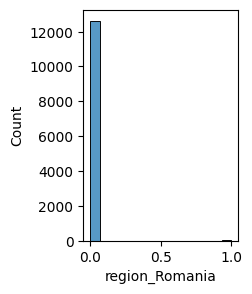

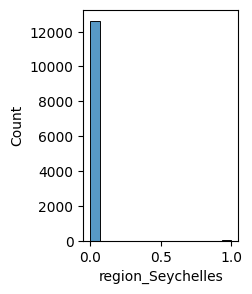

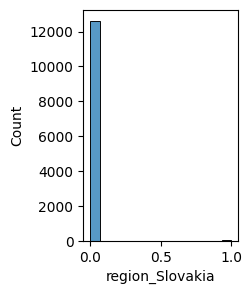

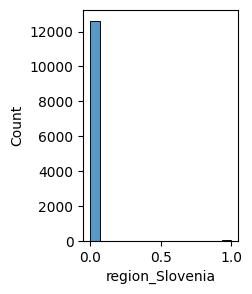

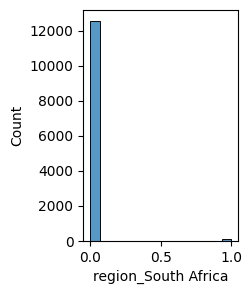

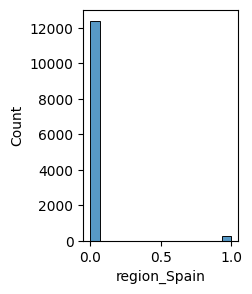

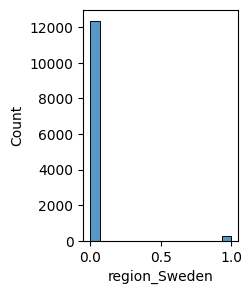

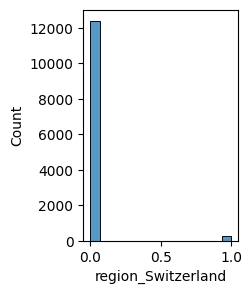

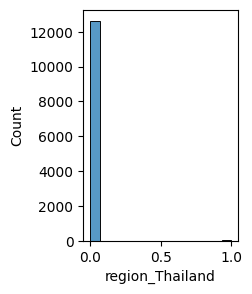

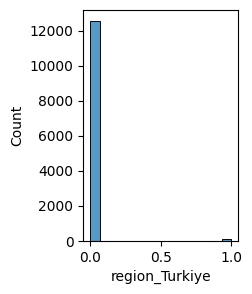

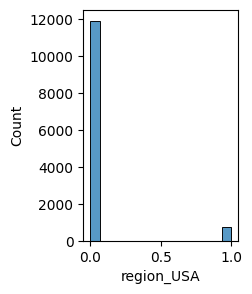

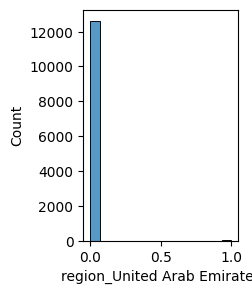

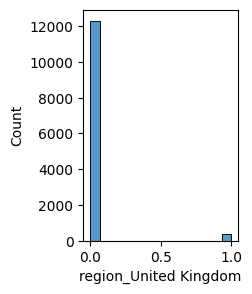

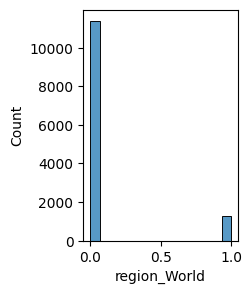

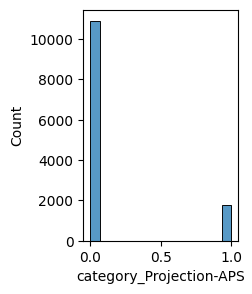

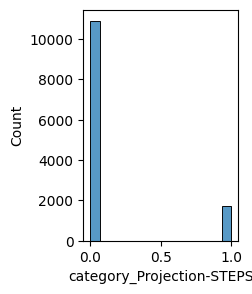

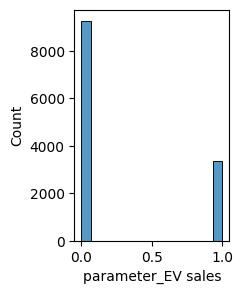

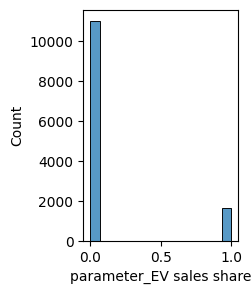

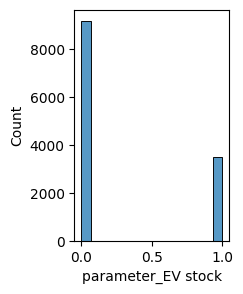

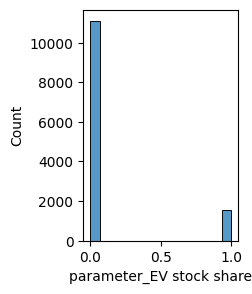

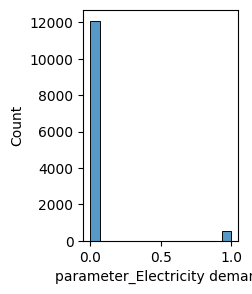

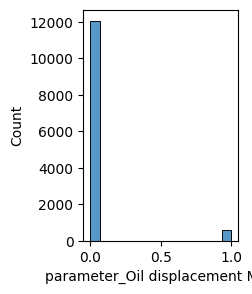

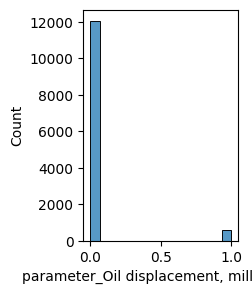

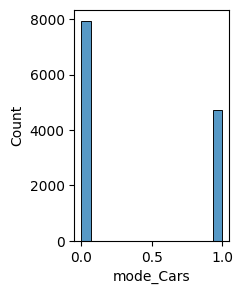

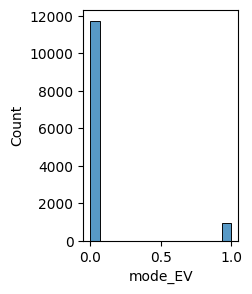

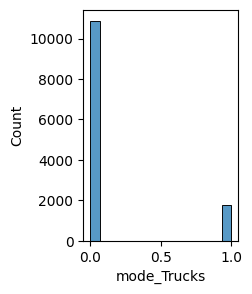

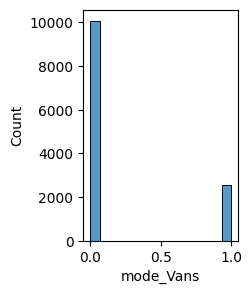

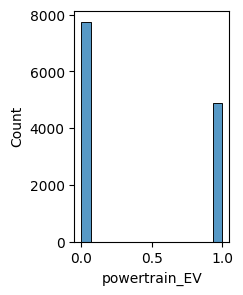

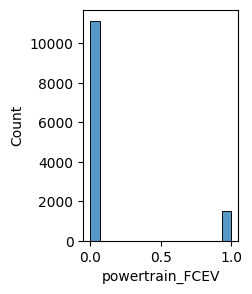

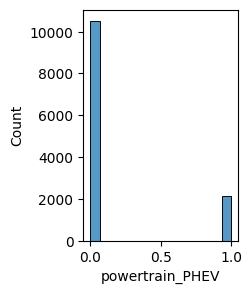

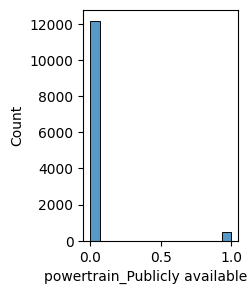

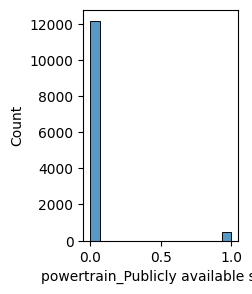

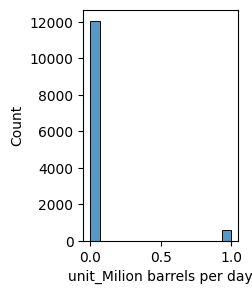

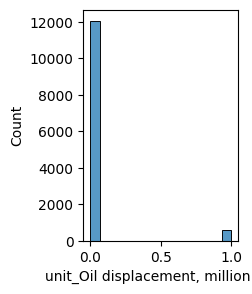

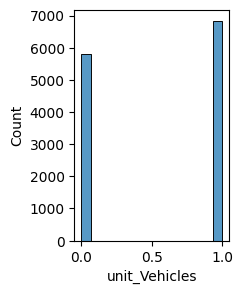

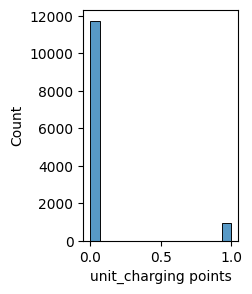

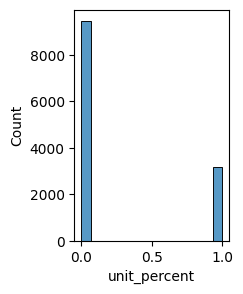

In [5]:
# distribution
for col in num_col:
  plt.figure(figsize=(2,3))
  sns.histplot(df[col])
  plt.show()

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(12654, 78)

(12654, 78)

In [10]:
y = df['powertrain_Publicly available slow']
X = df.drop('powertrain_Publicly available slow',axis=1)
X.head()

year      value  region_Austria  region_Belgium  region_Brazil  \
0  2011    0.00039               0               0              0   
1  2011    0.00650               0               0              0   
2  2011   49.00000               0               0              0   
3  2011   49.00000               0               0              0   
4  2012  220.00000               0               0              0   

   region_Bulgaria  region_Canada  region_Chile  region_China  \
0                0              0             0             0   
1                0              0             0             0   
2                0              0             0             0   
3                0              0             0             0   
4                0              0             0             0   

   region_Colombia  ...  mode_Vans  powertrain_EV  powertrain_FCEV  \
0                0  ...          0              1                0   
1                0  ...          0              1                0   
2                0  ...          0              0                0   
3                0  ...          0              0                0   
4                0  ...          0              0                0   

   powertrain_PHEV  powertrain_Publicly available fast  \
0                0                                   0   
1                0                                   0   
2                0                                   0   
3                0                                   0   
4                0                                   0   

   unit_Milion barrels per day  unit_Oil displacement, million lge  \
0                            0                                   0   
1                            0                                   0   
2                            0                                   0   
3                            0                                   0   
4                            0                                   0   

   unit_Vehicles  unit_charging points  unit_percent  
0              0                     0             1  
1              0                     0             1  
2              1                     0             0  
3              1                     0             0  
4              1                     0             0  

[5 rows x 77 columns]

In [11]:
cat_col_X = X.select_dtypes(include='object').columns
cat_col_X

Index([], dtype='object')

In [12]:
# label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col_X:
  X[col] = le.fit_transform(X[col])
X.head()
#

year      value  region_Austria  region_Belgium  region_Brazil  \
0  2011    0.00039               0               0              0   
1  2011    0.00650               0               0              0   
2  2011   49.00000               0               0              0   
3  2011   49.00000               0               0              0   
4  2012  220.00000               0               0              0   

   region_Bulgaria  region_Canada  region_Chile  region_China  \
0                0              0             0             0   
1                0              0             0             0   
2                0              0             0             0   
3                0              0             0             0   
4                0              0             0             0   

   region_Colombia  ...  mode_Vans  powertrain_EV  powertrain_FCEV  \
0                0  ...          0              1                0   
1                0  ...          0              1                0   
2                0  ...          0              0                0   
3                0  ...          0              0                0   
4                0  ...          0              0                0   

   powertrain_PHEV  powertrain_Publicly available fast  \
0                0                                   0   
1                0                                   0   
2                0                                   0   
3                0                                   0   
4                0                                   0   

   unit_Milion barrels per day  unit_Oil displacement, million lge  \
0                            0                                   0   
1                            0                                   0   
2                            0                                   0   
3                            0                                   0   
4                            0                                   0   

   unit_Vehicles  unit_charging points  unit_percent  
0              0                     0             1  
1              0                     0             1  
2              1                     0             0  
3              1                     0             0  
4              1                     0             0  

[5 rows x 77 columns]

<Axes: >

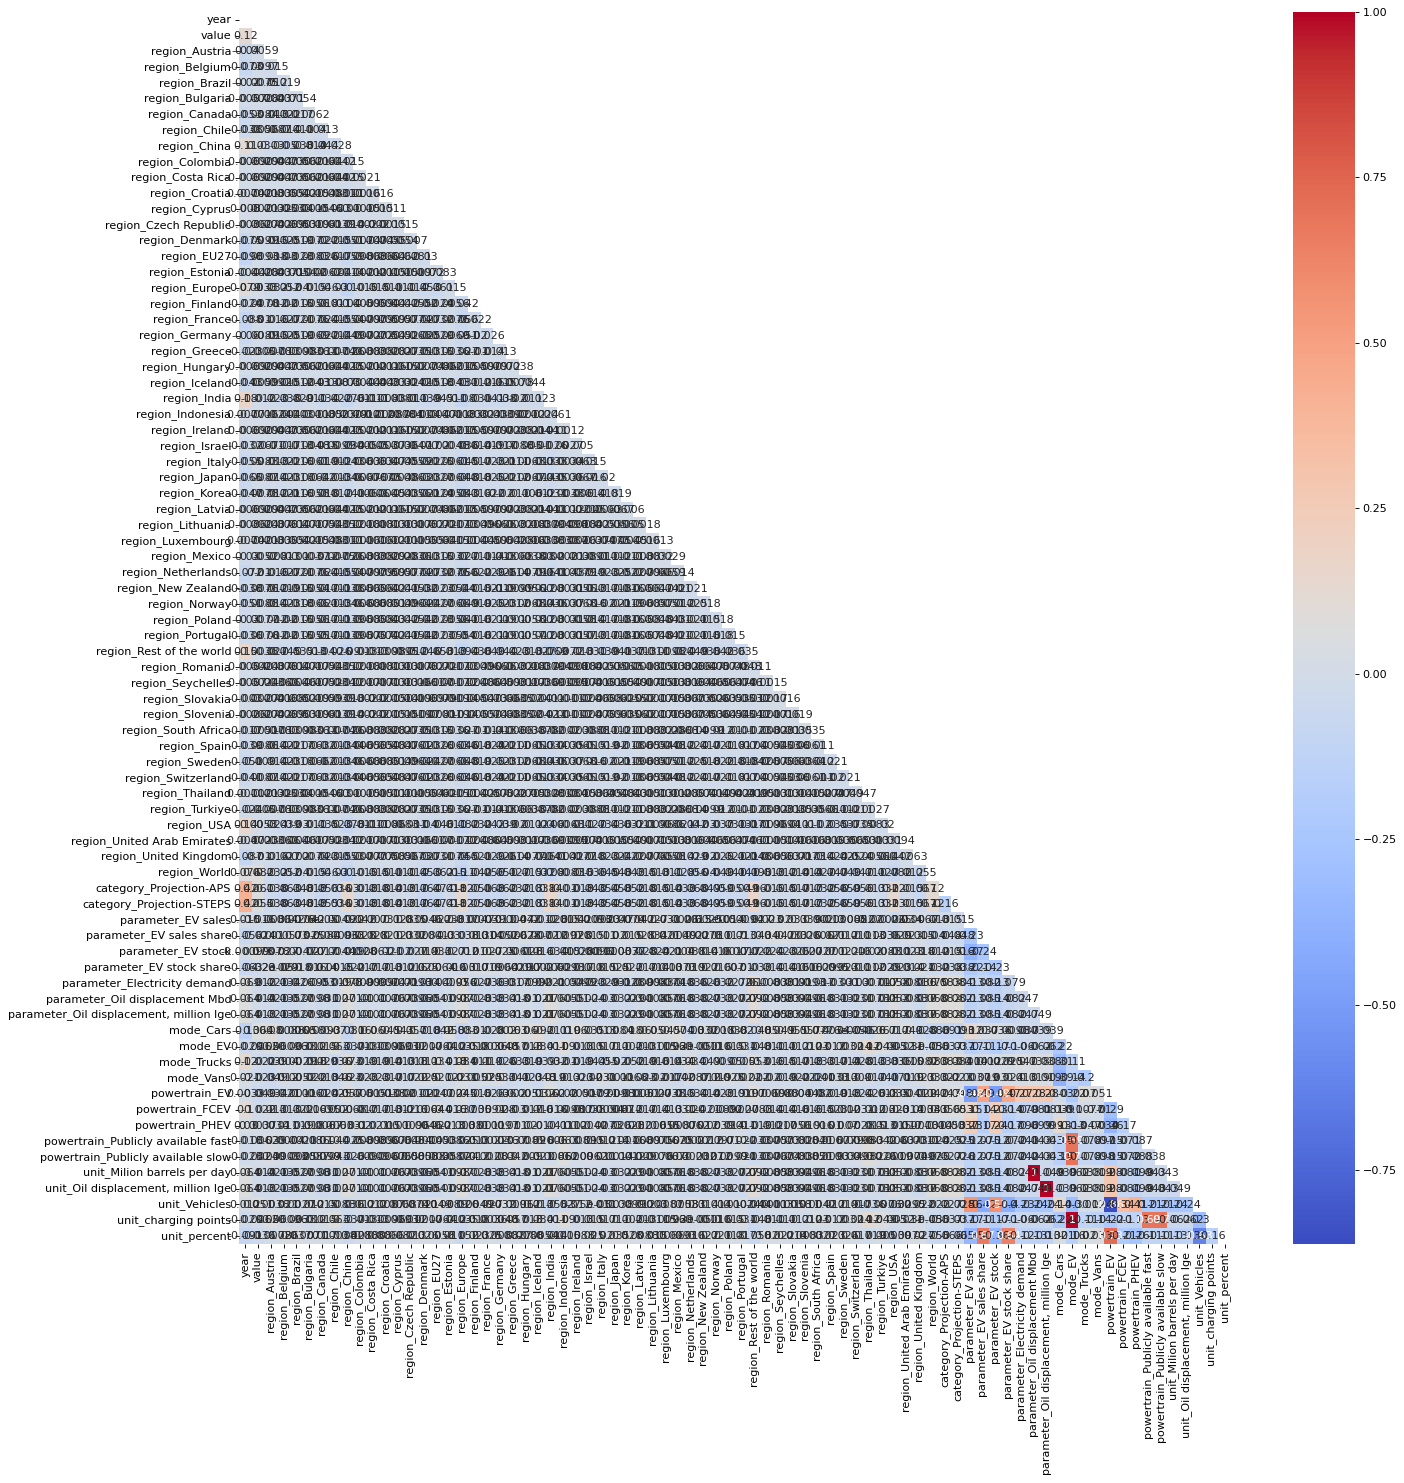

In [15]:
# heatmap with mask

mask = np.triu(np.ones_like(df.corr()))

fig,ax = plt.subplots(figsize=(20,20),dpi = 80)
sns.heatmap(df.corr(),annot=True,mask=mask, cmap='coolwarm')

In [19]:
# splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape
#

((10123, 77), (2531, 77))

In [20]:
y_train.shape,y_test.shape
#

((10123,), (2531,))

In [21]:
# training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.9628605294350059
[[2437    0]
 [  94    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2437
           1       0.00      0.00      0.00        94

    accuracy                           0.96      2531
   macro avg       0.48      0.50      0.49      2531
weighted avg       0.93      0.96      0.94      2531



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
